In [22]:
import glob
import os
import re
import pandas as pd
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

import skimage.transform
import scipy.ndimage
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
import random
import scipy as sp


In [86]:
DATA_PATH = '/kaggle/dev/data-science-bowl-2017-data/stage1_features_v3/'
LABELS = '/kaggle/dev/data-science-bowl-2017-data/stage1_labels.csv'


Patient 6ee742b62985570a1f3a142eb7e49188 predictions (14400, 4) transfer_values (14400, 512) label 1


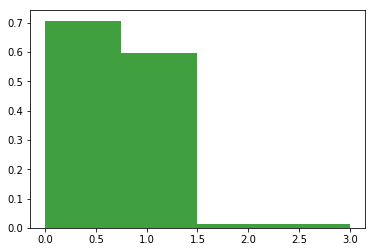

Patient d6d5ed3055d084a6abf0f97af3fe2ff0 predictions (15548, 4) transfer_values (15548, 512) label 1


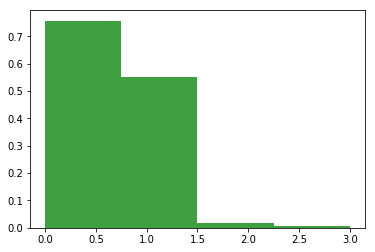

Patient 645e7f46eb9b834153ecf8e2b2921fe5 predictions (13824, 4) transfer_values (13824, 512) label 0


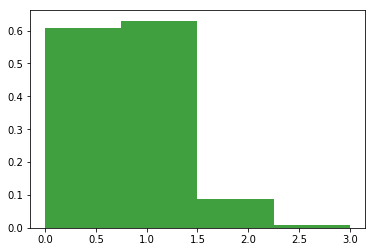

Patient e6d8b2631843a24e6761f2723ea30788 predictions (17576, 4) transfer_values (17576, 512) label 0


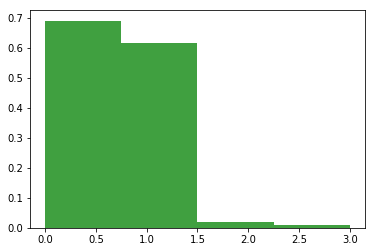

Patient f0f72264cd822301852578cc71288d3c predictions (13754, 4) transfer_values (13754, 512) label 0


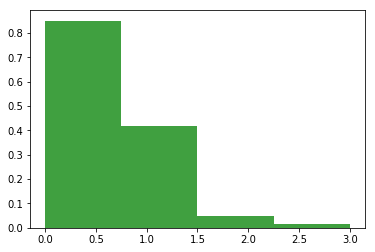

Patient a88c585e7d81744eec091a6f0600bd7b predictions (13750, 4) transfer_values (13750, 512) label 1


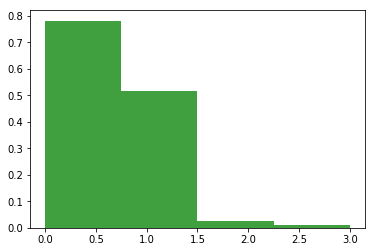

Patient 39c3a2d2ca67bc7a1a22240ea571d50c predictions (15548, 4) transfer_values (15548, 512) label 0


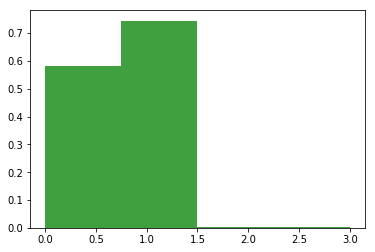

Patient 74b542d34b61740c1933d2c953403aa6 predictions (8820, 4) transfer_values (8820, 512) label 0


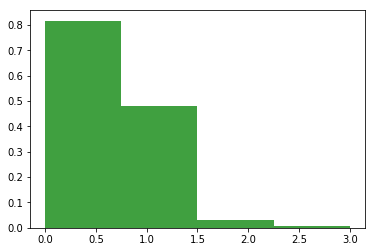

Patient 174a9fc87f54d6def3730954fbafc99d predictions (9261, 4) transfer_values (9261, 512) label 0


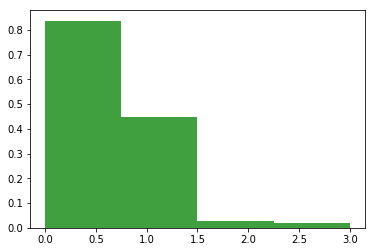

Patient 080e6a00e69888fd620894f9fd0714b1 predictions (18816, 4) transfer_values (18816, 512) label 0


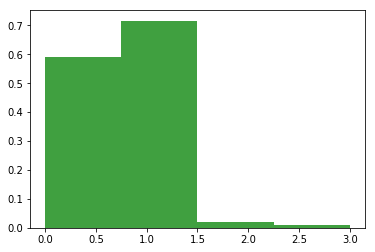

In [101]:
patients = []
prediction_values = []
transfer_values = []
labels = pd.read_csv(LABELS)
for features in glob.glob(DATA_PATH + '*_transfer_values.npy')[0:10]:
        n = re.match('([a-f0-9].*)_transfer_values.npy', os.path.basename(features))
        patient_id = n.group(1)
        prediction = np.load(DATA_PATH + patient_id + '_predictions.npy')
        transfer_value = np.load(DATA_PATH + patient_id + '_transfer_values.npy')
        patients.append(patient_id)
        prediction_values.append(prediction)
        transfer_values.append(transfer_value)
        try:
            label_val = int(labels.loc[labels['id'] == patient_id, 'cancer'])
        except TypeError:
            continue
        
        print('Patient {} predictions {} transfer_values {} label {}'.format(patient_id, prediction.shape, transfer_value.shape, label_val))
        
      
        prediction = np.argmax(prediction, axis = 1)
        plt.hist(prediction, 4, normed=1, facecolor='green', alpha=0.75)
        plt.show()

In [96]:
PATIENT_ANALYSIS_NUMBER = random.randint(0,10)
PATIENT_ANALYSIS_NUMBER = 3

In [97]:
prediction_values[PATIENT_ANALYSIS_NUMBER].shape

(17576, 4)

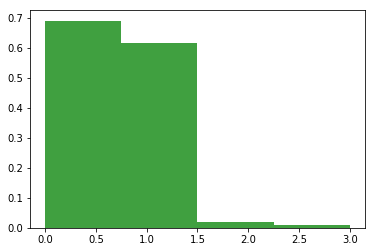

In [98]:
# Analyzing prediction values
prediction = prediction_values[PATIENT_ANALYSIS_NUMBER]
prediction = np.argmax(prediction, axis = 1)
plt.hist(prediction, 4, normed=1, facecolor='green', alpha=0.75)
plt.show()

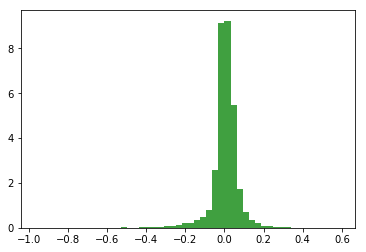

In [68]:
plt.hist(transfer_values[PATIENT_ANALYSIS_NUMBER].flatten(), 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

In [69]:
def plot_transfer_values(i):
    img = transfer_values[i]
    img = sp.misc.imresize(img, (1150, 1150))
    #img = img.reshape(transfer_values[i].shape[0], transfer_values[i].shape[1])
    # Plot the i'th image from the test-set.
    plt.imshow(img, interpolation='nearest')
    plt.figsize=(5,5)
    plt.show()

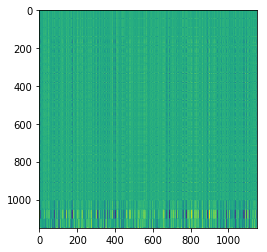

In [70]:
plot_transfer_values(PATIENT_ANALYSIS_NUMBER)